# PHASE 2 PROJECT
**Presented by:** Group 4.4
***

## Dennis Mwanzia & Pamela Awino 

# 1.0  Project Introduction and Overview

The aim of this project is to put into practice our newly aqcuired skills in data science to formulate and solve a real business problem. In this project, we are given a raw dataset which is the house sales prices in Northwestern County and we are supposed to formulate a real business case study and use the data to solve the business problem and provide a useful business advisory which can be used to formulate real and valuable business decisions. Unlike in phase 1, we are not given the business problem, its upon us to formulate it.

## 1.1 Business Understanding

In [86]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1.1.1 Data Understanding

We have been provided with King County House Sales dataset found in 'kc_house_data.csv'. There is a description of columns dataset found in the md folder 'column_names.md'. Therefore, we examine the column descriptions to understand their meaning.

In [87]:
with open('data/column_names.md', 'r') as f:
    md_text = f.read()

print(md_text)

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In this problem, we have been given a dataset that contains the following variables;
1. id - unique identified for a house
2. dateDate - house was sold
3. pricePrice - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

From the above description, we have enough data to understand the real estate market in King County. The Business problem we intend to solve is provide an advice to a real estate developer in King county on what type of houses/properties fetch the highest prices in the market, their locations, features and time of the year when homeowners are likely to purchase homes. As junior data analyst in a Real Estate Agency that markets properties on behalf of developers, we have been tasked with analyzing the house sales data in King county and advice a prospective new developer, Kings Wajenzi Developers on the type of properties that they should target for the King County Market.
King County Population has been increasing over the last decade and therefore demand for new homes is at an all time high, especially after incomes stabilized following the end of the corona virus pandemic. 


## 1.2 Objectives

1. Does the time of the year affect the price of an house? If yes, which seasons/Months are most profitable?
2. Does Location affect prices? If yes, which locations within King county attract highest price of houses?
3. Which features/Attributes have the highest impact on sales price of houses/properties? Which features should the developer focus on when developing their upcoming projects in King County?


# Data Understanding

In [88]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [89]:
df.shape

(21597, 21)

The dataset has 21597 rows and 21 columns

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The whole dataset is stored as pandas dataframe. We have three types of datatypes for columns which are integers, floats and objects. Since we are interested in running a linear regression model, we would like all the columns, to be numeric datatypes. However, some columns like date, waterfront, view, condition, grade, sqft_basement are objects and most likely categorical variables and will need to be transformed to dummy variables using one-hote encoding function of python. Intergers will also need to be examined to determine if they are binary variables or numeric data types. 

In [92]:
#Checking for any missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, view and year renovated have missing values. Lets check the percentage of missing values in the dataset.b

In [93]:
# Get percentage of missing values
for col in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[col].isnull().sum() * 100 / len(df)
    print(f"{col}:{round(percent_missing,2)}")

waterfront:11.0
view:0.29
yr_renovated:17.79


Waterfront, view and year renovated have 11.0%, 0.29%, and 17.79% respectively of missing data. Waterfront, and view are objects and therefore, we can replace the missing values with the mode while yr_renovated is a float and hence we will replace the missing value with the mean. 

In [94]:
print (df['waterfront'].mode())
print (df['view'].mode())




0    NO
dtype: object
0    NONE
dtype: object


In [95]:
df['waterfront'].fillna(df['waterfront'].mode()[0], inplace=True)
df['view'].fillna(df['view'].mode()[0], inplace=True)
df['yr_renovated'].fillna(0, inplace=True)



In [96]:
# check if all missing values have been resolved
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We nolonger have any missing values, therefore we proceed to check for duplicates and data types.

In [97]:
#checking for duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))

0


We dont have any duplicates and therefore we can proceed to investigate the integer and object data types.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [99]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [104]:
# Define a dictionary to map month integers to month names
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date column and map to month names using the dictionary
df['month_sold'] = df['date'].dt.month.map(month_dict)

# define seasons based on months
seasons = {'Winter': ['December', 'January', 'February'],
           'Spring': ['March', 'April', 'May'],
           'Summer': ['June', 'July', 'August'],
           'Fall': ['September', 'October', 'November']}

# create a new 'season' column based on the 'month_sold' column
df['season'] = df['month_sold'].apply(lambda x: next((season for season, months in seasons.items() if x in months), None))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,October,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,December,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,February,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,December,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,February,Winter


In [114]:
# Group by season and month_sold, and count the number of sales for each group
season_sales = df.groupby(['season', 'month_sold'])['price'].count()
# Find the season with the most sales

best_season = season_sales.groupby('season').max()

# Sort the seasons by total sales in descending order
best_season = best_season.sort_values(ascending=False)

# Print the season and corresponding months with the amount sold in each season
for season in best_season.index:
    months = ', '.join(seasons[season])
    sales = season_sales.loc[season]
    print(f"{season} ({months}): {sales.sum()} sales")
    print(sales)

Spring (March, April, May): 6518 sales
month_sold
April    2229
March    1875
May      2414
Name: price, dtype: int64
Summer (June, July, August): 6328 sales
month_sold
August    1939
July      2211
June      2178
Name: price, dtype: int64
Fall (September, October, November): 5056 sales
month_sold
November     1409
October      1876
September    1771
Name: price, dtype: int64
Winter (December, January, February): 3695 sales
month_sold
December    1470
February    1247
January      978
Name: price, dtype: int64


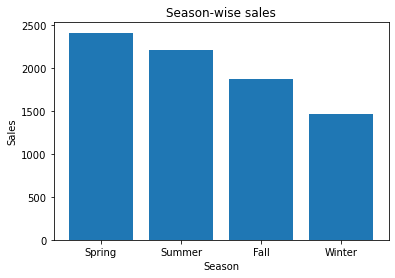

In [115]:
# Create a bar chart to show the sales for each season
plt.bar(best_season.index, best_season.values)
plt.title('Season-wise sales')
plt.xlabel('Season')
plt.ylabel('Sales')
plt.show()

import calendar

def clean_data(df):
    # drop id columns
    df.drop(columns=['id'], axis=1, inplace=True)
    
    # Fill missing values for waterfront
    df.waterfront.fillna(0.0, inplace=True)
    df.view.fillna(0.0, inplace=True)
    
    # Replace '?' in sqft_basement with 0.0
    df['sqft_basement'] = df.sqft_basement.replace('?', 0.0)
    
    # Convert sqft_basement to float
    df['sqft_basement']= df.sqft_basement.astype('float64')
    
    # Convert date column to 2 separate columns for month and year
    date = df['date'].str.split('/', expand=True)
    df['month_sold'] = date[0].astype('int64')
    df['year_sold'] = date[2].astype('int64')
    
    
    # Replace appropriate values in 'view' , 'waterfront', 'grade' and 'condition' columns
    df['view'] = df['view'].replace({'NONE': 0, 'AVERAGE': 3, 'GOOD': 4, 'FAIR': 2, 'EXCELLENT': 5})
    df['waterfront'] = df['waterfront'].replace({'NO': 0, 'YES': 1})
    df['grade'] = df['grade'].replace({3: 'Poor', 4: 'Low', 5: 'Fair', 6: 'Low Average', 7: 'Average', 8: 'Good', 9: 'Better', 10: 'Very Good', 11: 'Excellent', 12: 'Luxury', 13: 'Mansion'})
    df['condition'] = df['view'].replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})
    
    # Convert 'view', 'waterfront', 'grade' and 'condition' columns to apppropriate datatype
    df['view'] = df['view'].fillna(0).astype('int64')
    df['waterfront'] = df['waterfront'].astype('int64')
    df['grade'] = df['view'].fillna(0).astype('int64')
    df['condition'] = df['condition'].astype('int64')

    # Convert month number to month name
    #df['month_sold'] = df['month_sold'].apply(lambda x: calendar.month_name[x])
    #df['month_sold'] = df['month_sold'].astype('int64')
    
    # Drop original date column
    df.drop(columns=['date'], axis=1, inplace=True)
    
    # Convert year_built to age
    df['age'] = 2015 - df.yr_built
    df = df.drop(columns=['yr_built'], axis=1)
    
    # Fill missing values
    df.yr_renovated.fillna(0.0, inplace=True)
    
    # Create renovated column
    df['renovated'] = df.year_sold - df.yr_renovated
    renovated = df.renovated.values
    age = df.age.values
    values = np.where(renovated <= 10, 1, 0)
    df['renovated'] = np.where(age <= 5, 1, values)
    
    # Drop yr_renovated column
    df.drop(columns=['yr_renovated'], axis=1, inplace=True)
    
    return df


# Clean dataset
df = clean_data(df)

## Data Exploration

X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    fig, ax = plt.subplots(1, 1)
    sns.regplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col)
    plt.show()

## Modeling

In [15]:
# Looking at correlations between other variables and price
df.corr()["price"]

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

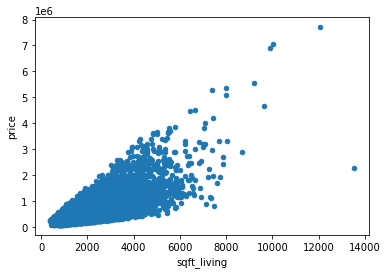

In [16]:
# Since Sqft_living is the feature with the strongest correlation in our dataset let's build our baseline model with that
df.plot.scatter(x="sqft_living", y="price");

There appears to be a fairly clear linear relationship between the Square footage of living space feature and price of a home in King County. We can use this to make a baseline model.

In [17]:
y = df["price"]
X_baseline = df[["sqft_living"]]

In [18]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:12:23   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [19]:
# display model coefficients
baseline_results.params

const         -43988.892194
sqft_living      280.863014
dtype: float64

### Baseline Model results

Looking at our summary above, our regression line is
$$ Price = 280 * sqft\_living - $43,988 $$

* The model is statistically significant as we can see, the p-value is below 0.05
* The model explains about 49%  of the variance in price looking at the R-Squared value which is 0.493
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* If a house had a living space of 850 square feet , we would expect price to be about $194,000
* Generally speaking, as the living space of the house increases, so does the price of the house




### Baseline Model visualization

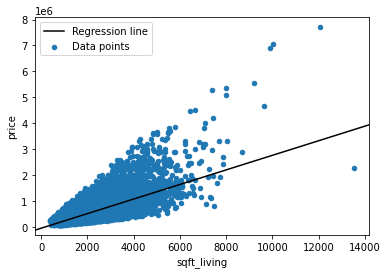

In [21]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Actions Points # check data types, separate date and month, then create a new column for date, month, and maybe season, autum, spring, winter, fall. 
Round off bathrooms to whole numbers since we cant have bathrooms as decimals
One-hot encode waterfront, view , grade, condition. 